In [26]:
import os
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt 
import matplotlib
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [7, 7]

Notes:
Possible marking candidate is:
- inner layer (slightly whiter stuff around the hole)
- The hole itself (would need to use a hough transform to score roundness, and region filtering to locate it)


#### Load Data

(1200, 1600) float64


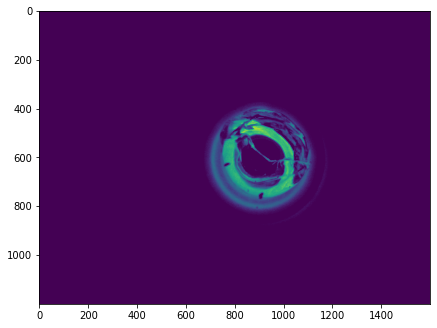

In [27]:
dataset_dir = "dataset"
img_paths = [os.path.join(os.getcwd(), dataset_dir, img) for img in os.listdir("dataset")]

def read_image(path):
  img = cv.imread(path, flags=cv.IMREAD_GRAYSCALE)
  return img / np.max(img)


img_original = read_image(img_paths[2])
plt.imshow(img_original)
print(img_original.shape, img_original.dtype)


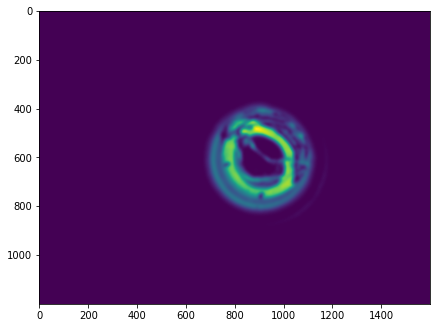

In [28]:
def blur(img, size = 41):
  return cv.GaussianBlur(img, (size, size), 0)


img_blurred = blur(img_original)
plt.imshow(img_blurred)


In [29]:
def thresh(img, threshval=0.45):
  return cv.threshold(img, thresh=threshval, maxval=1, type=cv.THRESH_BINARY)

ret, img_thresh = thresh(img_blurred)
plt.imshow(img_thresh)

# def thresh_interact(threshval=0.45):
#   global img_thresh
#   ret, img_thresh = thresh(img_blurred)
#   plt.imshow(img_thresh)

# interact(thresh_interact, thresh=0.45)


interactive(children=(FloatSlider(value=0.45, description='threshval', max=1.35, min=-0.45), Output()), _dom_c…

<function __main__.thresh_interact(threshval=0.45)>

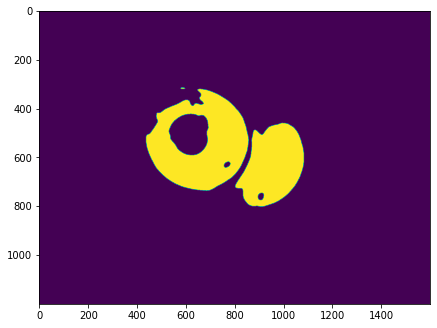

In [73]:
def threshval(img, thresh=0.3):
  return cv.threshold(img, thresh=thresh, maxval=1, type=cv.THRESH_BINARY)


ret, img_thresh = threshval(img_blurred)
plt.imshow(img_thresh)


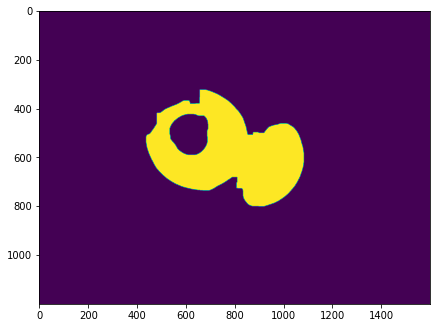

In [74]:
def m_open(img, size=21):
  kernel = np.ones((size, size), np.float32)
  return cv.morphologyEx(img, cv.MORPH_OPEN, kernel)


def m_close(img, size=21):
  kernel = np.ones((size, size), np.float32)
  return cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)

img_closed = m_open(m_close(img_thresh))
plt.imshow(img_closed)